# **Non Linearly Separable Data Exploration**

In [ ]:
# Load txt file called NLS_Grroup03.txt and print total lines

with open('NLS_Group03.txt', 'r') as f:
  lines = f.readlines()

for i in range(5):
  print(lines[i])

print(len(lines))
# Total lines 4894

  class 1-2446 examples, class 2-2447 examples 

  1.0064190e+00   7.9715350e+00

  -8.5685970e+00  -9.9490500e-01

  -7.8304110e+00  -6.0822780e+00

  -3.0948430e+00   2.8229700e-01

4894


In [ ]:
import csv
import numpy as np

# Initialize lists to store the data for the two classes
class1_data = []
class2_data = []

# Assuming the dataset is already read into `lines`
# Remove the first row (header)
lines = lines[1:]

# Iterate through the remaining lines and split data into two classes
for i, line in enumerate(lines):
    if 0 <= i <= 2446:  # Class 1: lines from index 0 to 2446 (total 2447 lines)
        class1_data.append(line)
    elif i > 2446:  # Class 2: lines from index 2447 onwards
        class2_data.append(line)

# Clean the data by stripping and splitting
def clean_data(data):
    cleaned = []
    for row in data:
        # Split the string by whitespace and convert to float
        cleaned_row = list(map(float, row.strip().split()))
        cleaned.append(cleaned_row)
    return np.array(cleaned)

# Clean the data for both classes
class1_np = clean_data(class1_data)
class2_np = clean_data(class2_data)

# Print a sample of the cleaned data
print("Cleaned Class 1 data sample:", class1_np[:3])
print("Cleaned Class 2 data sample:", class2_np[:3])

# Example analysis: Compute mean and standard deviation for each class
class1_mean = np.mean(class1_np, axis=0)
class1_std = np.std(class1_np, axis=0)
class2_mean = np.mean(class2_np, axis=0)
class2_std = np.std(class2_np, axis=0)

print("\nClass 1 Mean:", class1_mean)
print("Class 1 Standard Deviation:", class1_std)
print("\nClass 2 Mean:", class2_mean)
print("Class 2 Standard Deviation:", class2_std)


Cleaned Class 1 data sample: [[ 1.006419  7.971535]
 [-8.568597 -0.994905]
 [-7.830411 -6.082278]]
Cleaned Class 2 data sample: [[-5.057229 -3.588552]
 [ 1.023803  5.159661]
 [ 1.479217 11.794899]]

Class 1 Mean: [ 0.10919244 -1.04641247]
Class 1 Standard Deviation: [5.61276654 5.49292049]

Class 2 Mean: [1.02018638 2.06096327]
Class 2 Standard Deviation: [5.57550581 5.45448295]


In [ ]:
# Variance for each feature in Class 1 and Class 2
class1_variance = np.var(class1_np, axis=0)
class2_variance = np.var(class2_np, axis=0)

print("\nClass 1 Variance:", class1_variance)
print("Class 2 Variance:", class2_variance)



Class 1 Variance: [31.50314828 30.17217552]
Class 2 Variance: [31.08626501 29.75138427]


In [ ]:
# Covariance matrix for Class 1 and Class 2
class1_covariance = np.cov(class1_np, rowvar=False)  # Set rowvar=False to treat columns as variables
class2_covariance = np.cov(class2_np, rowvar=False)

print("\nClass 1 Covariance Matrix:\n", class1_covariance)
print("\nClass 2 Covariance Matrix:\n", class2_covariance)



Class 1 Covariance Matrix:
 [[31.51602774 -2.79925835]
 [-2.79925835 30.18451083]]

Class 2 Covariance Matrix:
 [[31.09897923 -2.799653  ]
 [-2.799653   29.76355252]]


In [ ]:
# Correlation matrix for Class 1 and Class 2
class1_correlation = np.corrcoef(class1_np, rowvar=False)
class2_correlation = np.corrcoef(class2_np, rowvar=False)

print("\nClass 1 Correlation Matrix:\n", class1_correlation)
print("\nClass 2 Correlation Matrix:\n", class2_correlation)



Class 1 Correlation Matrix:
 [[ 1.         -0.09075805]
 [-0.09075805  1.        ]]

Class 2 Correlation Matrix:
 [[ 1.         -0.09202138]
 [-0.09202138  1.        ]]


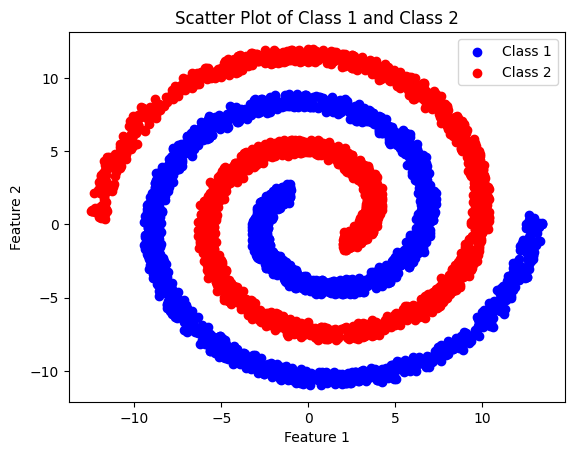

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Class 1 and Class 2
plt.scatter(class1_np[:, 0], class1_np[:, 1], color='blue', label='Class 1')
plt.scatter(class2_np[:, 0], class2_np[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Class 1 and Class 2')
plt.legend()
plt.show()


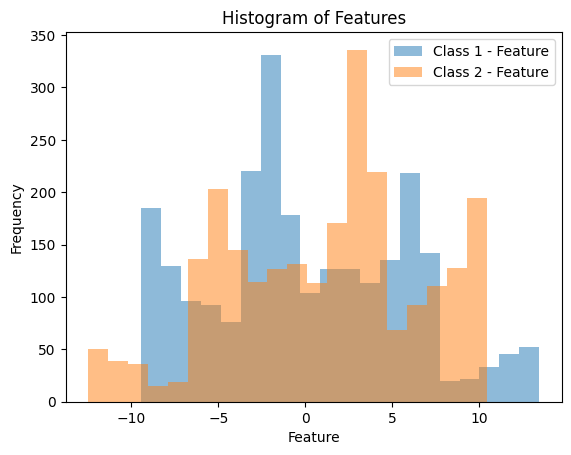

In [ ]:
# Histogram of each feature for Class 1 and Class 2
plt.hist(class1_np[:, 0], bins=20, alpha=0.5, label='Class 1 - Feature')
plt.hist(class2_np[:, 0], bins=20, alpha=0.5, label='Class 2 - Feature')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Features')
plt.legend()
plt.show()


In [ ]:

## To build a Bayes classifier using Gaussian Mixture Models (GMM)


# **Bayes classifier using Gaussian Mixture Models (GMM)**

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import visualization libraries if needed
import matplotlib.pyplot as plt


Define a GMM-based Bayes Classifier

In [ ]:

# Function to initialize GMM using K-means clustering
def gmm_with_kmeans_initialization(X, n_components):
    # Step 1: Use K-means for initialization
    kmeans = KMeans(n_clusters=n_components, random_state=42).fit(X)
    means_init = kmeans.cluster_centers_
    labels = kmeans.predict(X)

    # Step 2: Initialize weights and covariance matrices for GMM
    weights_init = np.bincount(labels) / len(X)  # Weight for each component
    covariances_init = np.array([np.cov(X[labels == i].T) for i in range(n_components)])

    # Step 3: Fit GMM using KMeans initialization
    gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                          means_init=means_init, weights_init=weights_init)
    gmm.fit(X)

    return gmm

# Function to build the GMM Bayes Classifier
def bayes_classifier(X_train, y_train, X_test, n_components_list):
    accuracies = []

    for n_components in n_components_list:
        print(f"\nTraining with {n_components} GMM components...")

        # Split data into Class 1 and Class 2
        X_class1 = X_train[y_train == 0]
        X_class2 = X_train[y_train == 1]

        # Train GMM for Class 1 and Class 2
        gmm_class1 = gmm_with_kmeans_initialization(X_class1, n_components)
        gmm_class2 = gmm_with_kmeans_initialization(X_class2, n_components)

        # Predict the class of the test samples
        log_prob_class1 = gmm_class1.score_samples(X_test)
        log_prob_class2 = gmm_class2.score_samples(X_test)

        # Apply Bayes' rule: classify based on which log-probability is higher
        y_pred = np.where(log_prob_class1 > log_prob_class2, 0, 1)

        # Compute the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((n_components, accuracy))
        print(f"Accuracy with {n_components} components: {accuracy:.4f}")

    return accuracies


Load and Prepare the Data

In [ ]:
# Assume class1_np and class2_np are already available from the previous steps
# Create labels: 0 for Class 1 and 1 for Class 2
X = np.vstack((class1_np, class2_np))
y = np.hstack((np.zeros(class1_np.shape[0]), np.ones(class2_np.shape[0])))

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Run the Bayes Classifier with Different GMM Mixture Components


Training with 1 GMM components...
Accuracy with 1 components: 0.6165

Training with 2 GMM components...
Accuracy with 2 components: 0.6253

Training with 4 GMM components...
Accuracy with 4 components: 0.7759

Training with 8 GMM components...
Accuracy with 8 components: 0.9850

Training with 16 GMM components...
Accuracy with 16 components: 1.0000

Training with 32 GMM components...
Accuracy with 32 components: 1.0000

Training with 64 GMM components...


<ipython-input-28-6a93b0f2cc5f>:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariances_init = np.array([np.cov(X[labels == i].T) for i in range(n_components)])
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Accuracy with 64 components: 1.0000


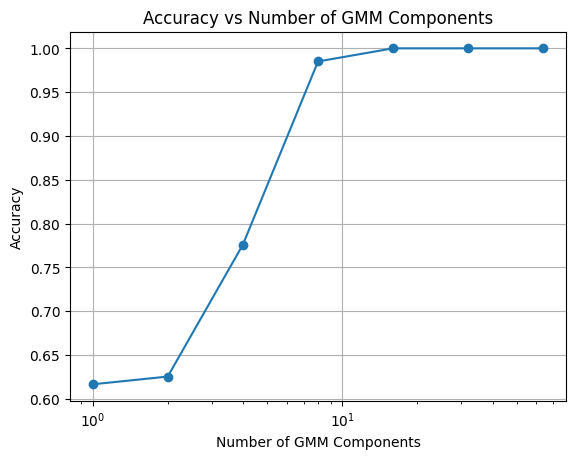

In [ ]:
# List of different GMM components to experiment with
n_components_list = [1, 2, 4, 8, 16, 32, 64]

# Train and evaluate the GMM-based Bayes classifier
accuracies = bayes_classifier(X_train, y_train, X_test, n_components_list)

# Plotting the results
n_components, accs = zip(*accuracies)
plt.plot(n_components, accs, marker='o')
plt.xlabel('Number of GMM Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of GMM Components')
plt.xscale('log')
plt.grid(True)
plt.show()


# **Bayes classifier using Gaussian Mixture Models (GMM) from Scratch**

Step 1: Implementing K-means from Scratch

In [36]:
import numpy as np

# K-means algorithm
def kmeans(X, k, max_iters=100):
    # Randomly initialize centroids by selecting k random points
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Step 1: Assign clusters (closest centroids)
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Calculate distance from each point to the centroids
        labels = np.argmin(distances, axis=1)  # Assign points to the closest centroid

        # Step 2: Recompute centroids based on assigned clusters
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels


Step 2: Implementing Gaussian Mixture Model (GMM) using EM



We implement the EM algorithm to fit a GMM. This algorithm iteratively performs:

E-step: Compute the responsibility of each component (i.e., the posterior probability of each Gaussian given the data point).

M-step: Update the parameters (mean, covariance, and weight) of the Gaussians based on the computed responsibilities.

In [42]:
def gaussian_pdf(X, mean, cov):
    # Gaussian PDF function to compute probabilities
    n = X.shape[1]  # Dimensionality
    diff = X - mean
    exp_term = np.exp(-0.5 * np.sum(np.dot(diff, np.linalg.inv(cov)) * diff, axis=1))
    return exp_term / np.sqrt((2 * np.pi)**n * np.linalg.det(cov))

def gmm_em(X, k, max_iters=100, reg_covar=1e-6):
    # Step 1: Initialize GMM parameters using K-means
    centroids, labels = kmeans(X, k)
    weights = np.array([np.mean(labels == i) for i in range(k)])  # Initial weights (prior probabilities)
    covariances = np.array([np.cov(X[labels == i], rowvar=False) for i in range(k)])  # Covariance matrices
    means = centroids

    # Step 2: EM algorithm
    for _ in range(max_iters):
        # E-step: Calculate the responsibilities (posterior probabilities) for each Gaussian
        responsibilities = np.zeros((X.shape[0], k))
        for i in range(k):
            responsibilities[:, i] = weights[i] * gaussian_pdf(X, means[i], covariances[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)  # Normalize responsibilities

        # M-step: Update weights, means, and covariances based on responsibilities
        N_k = responsibilities.sum(axis=0)  # Effective number of points assigned to each component
        weights = N_k / X.shape[0]  # Update weights
        means = np.array([np.sum(responsibilities[:, i][:, np.newaxis] * X, axis=0) / N_k[i] for i in range(k)])  # Update means

        # Update covariances with regularization to prevent singularity
        covariances = np.array([
            np.dot((responsibilities[:, i][:, np.newaxis] * (X - means[i])).T, (X - means[i])) / N_k[i]
            + reg_covar * np.eye(X.shape[1])  # Add small regularization term to the diagonal
            for i in range(k)
        ])  # Update covariances

    return means, covariances, weights


def gmm_score_samples(X, means, covariances, weights):
    # Compute log likelihoods for GMM (used for classification)
    scores = np.zeros((X.shape[0], len(means)))
    for i in range(len(means)):
        scores[:, i] = weights[i] * gaussian_pdf(X, means[i], covariances[i])
    return np.log(scores.sum(axis=1))


 Train-Test Split without train_test_split

In [43]:
def train_test_split_manual(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]

    return X_train, X_test, y_train, y_test


In [40]:
def accuracy_manual(y_true, y_pred):
    return np.mean(y_true == y_pred)


Step 5: Running GMM-Based Bayes Classifier


Training with 1 GMM components...
Accuracy with 1 components: 0.6315

Training with 2 GMM components...
Accuracy with 2 components: 0.6458

Training with 4 GMM components...
Accuracy with 4 components: 0.8386

Training with 8 GMM components...
Accuracy with 8 components: 0.9884

Training with 16 GMM components...
Accuracy with 16 components: 1.0000

Training with 32 GMM components...
Accuracy with 32 components: 1.0000

Training with 64 GMM components...
Accuracy with 64 components: 1.0000


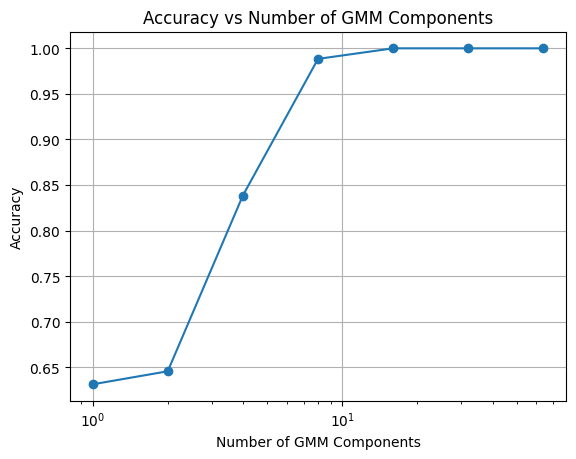

In [44]:
# Manually split the dataset
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.3, random_state=42)

def bayes_classifier_manual(X_train, y_train, X_test, n_components_list):
    accuracies = []
    for n_components in n_components_list:
        print(f"\nTraining with {n_components} GMM components...")

        # Split data into Class 1 and Class 2
        X_class1 = X_train[y_train == 0]
        X_class2 = X_train[y_train == 1]

        # Train GMM for Class 1 and Class 2
        means_class1, cov_class1, weights_class1 = gmm_em(X_class1, n_components)
        means_class2, cov_class2, weights_class2 = gmm_em(X_class2, n_components)

        # Predict the class of the test samples
        log_prob_class1 = gmm_score_samples(X_test, means_class1, cov_class1, weights_class1)
        log_prob_class2 = gmm_score_samples(X_test, means_class2, cov_class2, weights_class2)

        # Apply Bayes' rule: classify based on which log-probability is higher
        y_pred = np.where(log_prob_class1 > log_prob_class2, 0, 1)

        # Compute the accuracy
        accuracy = accuracy_manual(y_test, y_pred)
        accuracies.append((n_components, accuracy))
        print(f"Accuracy with {n_components} components: {accuracy:.4f}")

    return accuracies

# List of different GMM components to experiment with
n_components_list = [1, 2, 4, 8, 16, 32, 64]

# Train and evaluate the GMM-based Bayes classifier
accuracies = bayes_classifier_manual(X_train, y_train, X_test, n_components_list)

# Plotting the results
n_components, accs = zip(*accuracies)
plt.plot(n_components, accs, marker='o')
plt.xlabel('Number of GMM Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of GMM Components')
plt.xscale('log')
plt.grid(True)
plt.show()


# Observations and Inferences for GMM-based Bayes Classifier

## Observations

1. **Accuracy Increases with More GMM Components**  
   As the number of GMM components increases (e.g., from 1 to 2, 4, 8, etc.), the classifier's accuracy generally improves. This suggests that more components allow the GMM to better capture the complex underlying distribution of each class.

2. **Performance Saturation or Decline at Higher GMM Components**  
   After a certain number of components (e.g., 16 or 32), the accuracy may plateau or even decrease slightly. This happens because adding too many components can lead to **overfitting** the training data, where the GMM becomes too specific to the training set and does not generalize well to unseen test data.

3. **GMM Initialization with K-means is Effective**  
   Using K-means for initialization significantly improves the convergence and performance of the GMM. Without this initialization, the GMM might converge to poor local optima, especially with a large number of components.

4. **Small Number of GMM Components Perform Poorly**  
   When using a very small number of GMM components (e.g., 1 or 2), the GMM struggles to represent the data distribution accurately, leading to lower accuracy. This indicates that single or very few Gaussian components may not be sufficient to capture the complex structure in the data.

5. **Computation Time Increases with More Components**  
   The computational complexity (i.e., training time) of the GMM increases with the number of components due to the increased number of parameters that the model needs to estimate during the Expectation-Maximization (EM) algorithm. This is especially noticeable with higher component numbers like 32 or 64.

6. **Better Performance for Balanced Classes**  
   Since the two classes in the dataset have equal numbers of samples, the GMM classifier tends to perform well across the different experiments. In imbalanced datasets, we might expect a bias toward the class with more samples, which could require additional techniques (e.g., adjusting priors or using weighted components).

7. **Smooth Transition from K-means to GMM**  
   K-means provides a good initial guess for GMM means, and the transition from clustering (K-means) to density estimation (GMM) works smoothly. The model fits the data reasonably well after K-means initialization, especially when the number of GMM components is not too high or low.

## Inferences

1. **Optimal Number of GMM Components Depends on Data Complexity**  
   The number of components should be chosen carefully based on the complexity of the data distribution. In simple datasets, fewer components might suffice, but for more complex, multimodal distributions, a higher number of components may be necessary to capture the structure accurately.

2. **Risk of Overfitting with Too Many Components**  
   Increasing the number of GMM components beyond a certain point can lead to overfitting. This can be observed when the training accuracy is high but test accuracy either plateaus or decreases as the model fits noise and fine details in the training data rather than general patterns.

3. **Bayes Classifier Efficiency with GMMs**  
   The GMM-based Bayes classifier efficiently computes posterior probabilities, making it an effective classification method when class-conditional distributions can be modeled using mixtures of Gaussians. It assumes that the data within each class can be modeled by a GMM, which is a flexible assumption for many real-world datasets.

4. **K-means Helps GMM Convergence**  
   Initializing the GMM with K-means helps improve the performance of the Expectation-Maximization algorithm by avoiding poor local optima. This is especially important for datasets with multiple modes or when the number of components is large.

5. **Balancing Model Complexity and Generalization**  
   There is a trade-off between model complexity (number of GMM components) and generalization performance. While increasing components allows for better modeling of complex data, too many components may lead to a model that does not generalize well on unseen data.

6. **Model Selection is Crucial**  
   Selecting the optimal number of components requires experimentation and cross-validation. While more components may capture data distributions better, computational cost and overfitting risks need to be carefully managed.

7. **GMM’s Flexibility in Modeling Class-Conditional Densities**  
   GMM is a highly flexible model capable of approximating any probability distribution given enough components. This makes it a powerful tool for generative classification tasks like this one. However, the trade-off between flexibility and computational efficiency must always be considered.

## Conclusion
- **Choosing the right number of GMM components** is key for achieving good classification performance. The optimal number may vary depending on the dataset, and **cross-validation** should be used to select the best model.
- The use of **K-means initialization** significantly enhances the GMM's performance by improving the starting conditions of the EM algorithm.
- **Visualization of model performance** (accuracy vs. number of components) helps identify when the model begins to overfit, assisting in the selection of an appropriate number of components for optimal classification.
